In [2]:
# %matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib
import matplotlib.pyplot as plt

import glob
import itertools
import os

from run import Run
from runs_db import db as runs_db

[('deepnet5', 288), ('deepnet2070', 312)]


In [4]:
log_path = '/home/mpikuliak/logs'
runs = []

for server in runs_db:
    paths = glob.glob(os.path.join(log_path, server, '*'))
    paths = iter(sorted(paths))

    try:
        for (number, type_, code) in runs_db[server]:
            for _ in range(number):
                try:
                    path = next(paths)
                    runs.append(Run(path, type_, code))
                except KeyError:
                    print(path)
    except StopIteration:
        pass


In [5]:
tasks = ['dep', 'lmo', 'ner', 'pos']
langs = ['cs', 'de', 'en', 'es']

task_metr = {
    'dep': 'las',
    'lmo': 'perplexity',
    'ner': 'chunk_f1',
    'pos': 'acc'
}

task_max = {
    'dep': True,
    'lmo': False,
    'ner': True,
    'pos': True
}

def draw_graphs(metric_func, tasks, langs, role, run_codes=None, run_types=None, focused=False):
    fig, axes = plt.subplots(len(tasks), len(langs), figsize=(5*len(langs), 4*len(tasks)), squeeze=False)

    relevant_runs = ['vanilla']

    for task, lang in itertools.product(tasks, langs):
        for run in runs:
            if (
                (not focused or run.config['focus_on'] == f'{task}-{lang}') and
                (run_codes is None or run.code in run_codes) and
                (run_types is None or run.type in run_types)
            ):

                history = run.history(
                    metric=metric_func(task),
                    task=task,
                    language=lang,
                    role=role)
                axes[tasks.index(task), langs.index(lang)].plot(list(history), label=f'{run.code}-{run.type}')
                #axes[tasks.index(task), langs.index(lang)].plot(list(history), label=run.type)

    for ax, col in zip(axes[0], langs):
        ax.set_title(col)

    for ax, row in zip(axes[:, 0], tasks):
        ax.set_ylabel(row, rotation=0, size='large')
        
    for ax_row in axes:
        for ax in ax_row:
            ax.legend()

    plt.show()
    
def find_runs(run_code=None, run_type=None, contains=None, **config):
    
    if contains is None:
        contains = []
    
    return (run
           for run
           in runs
           if  (run_code is None or run_code == run.code) and
               (run_type is None or run_type == run.type) and
               all(run.contains(*task_lang) for task_lang in contains) and
               all(run.config[key] == value for key, value in config.items()))
    
    
def print_results(runs, tasks, langs, metric_func=None, metric_max_func=None, focused=True):
    
    if metric_func is None:
        metric_func = lambda task: task_metr[task]
        
    if metric_max_func is None:
        metric_max_func = lambda task: task_max[task]
        
    output = []

    for run in runs:
        for task, lang in itertools.product(tasks, langs):
            if not focused or run.config['focus_on'] == f'{task}-{lang}':
                res, epoch = run.metric_eval(
                    metric=metric_func(task),
                    max_=metric_max_func(task),
                    task=task,
                    language=lang)
                if res <= 1.01:
                    res *= 100
                #print(task, lang, res, epoch)
                print(f'{res:.2f}', end=' ')
                print(run.name)
                if(run.config['word_lstm_task']):
                    print(run.config['tasks'])
                output.append((res, epoch, run))

    return output

2019-10-01-153028
es vocabulary constructed.
It contains 35773 words (73.96%).
It covers 402894 tokens (97.85%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: '.', 5: 'la', 6: 'en', 7: 'y', 8: '#', 9: 'a'} and 35763 others

cs vocabulary constructed.
It contains 78011 words (54.33%).
It covers 1413047 tokens (94.44%).
{0: '<UNK>', 1: ',', 2: '.', 3: 'a', 4: 'v', 5: '#', 6: 'se', 7: 'na', 8: 'je', 9: 'že'} and 78001 others

Character vocabulary constructed.
It contains 112 characters (33.53%).
It covers 9011950 character occurrences (99.98%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: '+'} and 103 others

Created:
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset pos cs train (POSDataset): 67852
Dataset pos cs dev (POSDataset): 9205
Dataset pos cs test (POSDataset): 10046

Loading es embedding matrix.
Loaded.
Loading cs embedding matrix.
Loaded.
Model restored from /home/mpikuliak/log

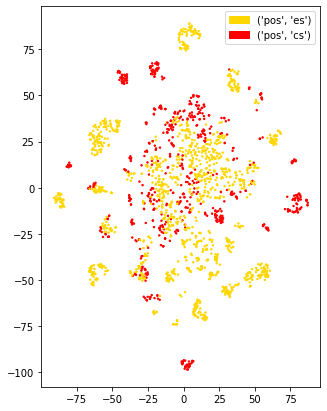

2019-10-01-162953
es vocabulary constructed.
It contains 35773 words (73.96%).
It covers 805788 tokens (97.85%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: '.', 5: 'la', 6: 'en', 7: 'y', 8: '#', 9: 'a'} and 35763 others

cs vocabulary constructed.
It contains 78011 words (54.33%).
It covers 1413047 tokens (94.44%).
{0: '<UNK>', 1: ',', 2: '.', 3: 'a', 4: 'v', 5: '#', 6: 'se', 7: 'na', 8: 'je', 9: 'že'} and 78001 others

Character vocabulary constructed.
It contains 116 characters (34.73%).
It covers 10797528 character occurrences (99.98%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: '+'} and 107 others

Created:
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset pos cs train (POSDataset): 67852
Dataset pos cs dev (POSDataset): 9205
Dataset pos cs test (POSDataset): 10046
Dataset dep es train (DEPDataset): 13972
Dataset dep es dev (DEPDataset): 1392
Dataset dep es test (DEPDataset): 

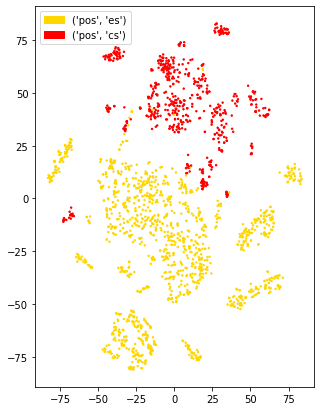

2019-10-01-170540
es vocabulary constructed.
It contains 35773 words (73.96%).
It covers 402894 tokens (97.85%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: '.', 5: 'la', 6: 'en', 7: 'y', 8: '#', 9: 'a'} and 35763 others

cs vocabulary constructed.
It contains 78011 words (54.33%).
It covers 2826094 tokens (94.44%).
{0: '<UNK>', 1: ',', 2: '.', 3: 'a', 4: 'v', 5: '#', 6: 'se', 7: 'na', 8: 'je', 9: 'že'} and 78001 others

Character vocabulary constructed.
It contains 116 characters (34.73%).
It covers 16239338 character occurrences (99.99%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: '+'} and 107 others

Created:
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset pos cs train (POSDataset): 67852
Dataset pos cs dev (POSDataset): 9205
Dataset pos cs test (POSDataset): 10046
Dataset dep cs train (DEPDataset): 67852
Dataset dep cs dev (DEPDataset): 9205
Dataset dep cs test (DEPDataset): 

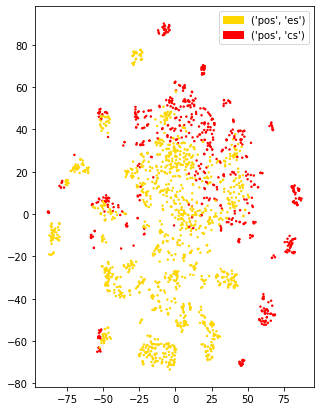

2019-10-01-174936
es vocabulary constructed.
It contains 35773 words (73.96%).
It covers 805788 tokens (97.85%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: '.', 5: 'la', 6: 'en', 7: 'y', 8: '#', 9: 'a'} and 35763 others

cs vocabulary constructed.
It contains 78011 words (54.33%).
It covers 2826094 tokens (94.44%).
{0: '<UNK>', 1: ',', 2: '.', 3: 'a', 4: 'v', 5: '#', 6: 'se', 7: 'na', 8: 'je', 9: 'že'} and 78001 others

Character vocabulary constructed.
It contains 120 characters (35.93%).
It covers 18024970 character occurrences (99.99%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: '+'} and 110 others

Created:
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset pos cs train (POSDataset): 67852
Dataset pos cs dev (POSDataset): 9205
Dataset pos cs test (POSDataset): 10046
Dataset dep es train (DEPDataset): 13972
Dataset dep es dev (DEPDataset): 1392
Dataset dep es test (DEPDataset): 

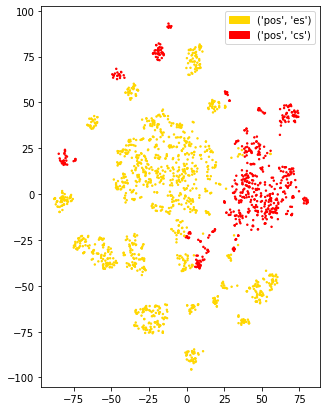

2019-10-01-185138
es vocabulary constructed.
It contains 35773 words (73.96%).
It covers 805788 tokens (97.85%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: '.', 5: 'la', 6: 'en', 7: 'y', 8: '#', 9: 'a'} and 35763 others

cs vocabulary constructed.
It contains 78011 words (54.33%).
It covers 2826094 tokens (94.44%).
{0: '<UNK>', 1: ',', 2: '.', 3: 'a', 4: 'v', 5: '#', 6: 'se', 7: 'na', 8: 'je', 9: 'že'} and 78001 others

Character vocabulary constructed.
It contains 120 characters (35.93%).
It covers 18024970 character occurrences (99.99%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: '+'} and 110 others

Created:
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset pos cs train (POSDataset): 67852
Dataset pos cs dev (POSDataset): 9205
Dataset pos cs test (POSDataset): 10046
Dataset dep es train (DEPDataset): 13972
Dataset dep es dev (DEPDataset): 1392
Dataset dep es test (DEPDataset): 

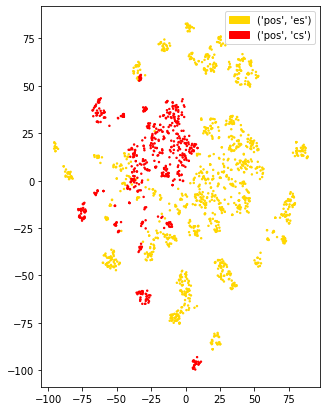

2019-10-01-195814
es vocabulary constructed.
It contains 35773 words (73.96%).
It covers 805788 tokens (97.85%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: '.', 5: 'la', 6: 'en', 7: 'y', 8: '#', 9: 'a'} and 35763 others

cs vocabulary constructed.
It contains 78011 words (54.33%).
It covers 2826094 tokens (94.44%).
{0: '<UNK>', 1: ',', 2: '.', 3: 'a', 4: 'v', 5: '#', 6: 'se', 7: 'na', 8: 'je', 9: 'že'} and 78001 others

Character vocabulary constructed.
It contains 120 characters (35.93%).
It covers 18024970 character occurrences (99.99%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: '+'} and 110 others

Created:
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset pos cs train (POSDataset): 67852
Dataset pos cs dev (POSDataset): 9205
Dataset pos cs test (POSDataset): 10046
Dataset dep es train (DEPDataset): 13972
Dataset dep es dev (DEPDataset): 1392
Dataset dep es test (DEPDataset): 

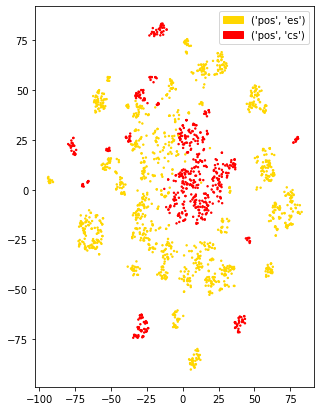

2019-10-01-210208
de vocabulary constructed.
It contains 35796 words (68.76%).
It covers 272409 tokens (93.85%).
{0: '<UNK>', 1: '.', 2: ',', 3: 'der', 4: 'die', 5: 'in', 6: 'und', 7: '#', 8: 'dem', 9: 'von'} and 35786 others

es vocabulary constructed.
It contains 35773 words (73.96%).
It covers 402894 tokens (97.85%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: '.', 5: 'la', 6: 'en', 7: 'y', 8: '#', 9: 'a'} and 35763 others

Character vocabulary constructed.
It contains 95 characters (25.54%).
It covers 3296981 character occurrences (99.94%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: "'", 5: '(', 6: ')', 7: ',', 8: '-', 9: '.'} and 86 others

Created:
Dataset pos de train (POSDataset): 13791
Dataset pos de dev (POSDataset): 799
Dataset pos de test (POSDataset): 967
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416

Loading de embedding matrix.
Loaded.
Loading es embedding matrix.
Loaded.
Model restored from /home/mpikuliak/lo

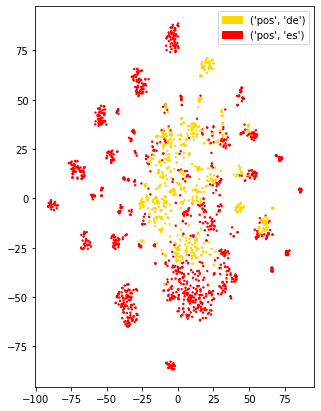

2019-10-01-214128
de vocabulary constructed.
It contains 65008 words (56.23%).
It covers 820410 tokens (93.77%).
{0: '<UNK>', 1: '.', 2: ',', 3: 'der', 4: 'die', 5: '#', 6: 'und', 7: 'in', 8: 'von', 9: 'dem'} and 64998 others

es vocabulary constructed.
It contains 35773 words (73.96%).
It covers 402894 tokens (97.85%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: '.', 5: 'la', 6: 'en', 7: 'y', 8: '#', 9: 'a'} and 35763 others

Character vocabulary constructed.
It contains 102 characters (21.34%).
It covers 6380512 character occurrences (99.96%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: ','} and 93 others

Created:
Dataset pos de train (POSDataset): 13791
Dataset pos de dev (POSDataset): 799
Dataset pos de test (POSDataset): 967
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset ner de train (NERDataset): 24000
Dataset ner de dev (NERDataset): 2200
Dataset ner de test (NERDataset):

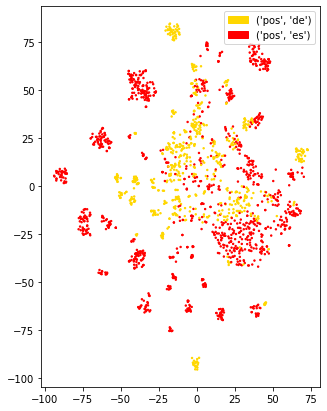

2019-10-01-220851
de vocabulary constructed.
It contains 35796 words (68.76%).
It covers 272409 tokens (93.85%).
{0: '<UNK>', 1: '.', 2: ',', 3: 'der', 4: 'die', 5: 'in', 6: 'und', 7: '#', 8: 'dem', 9: 'von'} and 35786 others

es vocabulary constructed.
It contains 43387 words (69.47%).
It covers 743755 tokens (97.99%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: 'la', 5: '.', 6: 'en', 7: 'que', 8: 'y', 9: '#'} and 43377 others

Character vocabulary constructed.
It contains 96 characters (25.81%).
It covers 4853556 character occurrences (99.96%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: "'", 5: '(', 6: ')', 7: ',', 8: '-', 9: '.'} and 87 others

Created:
Dataset pos de train (POSDataset): 13791
Dataset pos de dev (POSDataset): 799
Dataset pos de test (POSDataset): 967
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset ner es train (NERDataset): 6940
Dataset ner es dev (NERDataset): 1565
Dataset ner es test (NERDataset):

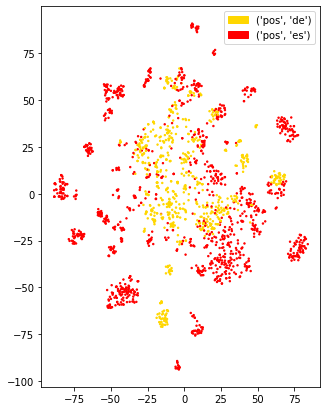

2019-10-01-223743
de vocabulary constructed.
It contains 65008 words (56.23%).
It covers 820410 tokens (93.77%).
{0: '<UNK>', 1: '.', 2: ',', 3: 'der', 4: 'die', 5: '#', 6: 'und', 7: 'in', 8: 'von', 9: 'dem'} and 64998 others

es vocabulary constructed.
It contains 43387 words (69.47%).
It covers 743755 tokens (97.99%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: 'la', 5: '.', 6: 'en', 7: 'que', 8: 'y', 9: '#'} and 43377 others

Character vocabulary constructed.
It contains 104 characters (21.76%).
It covers 7937264 character occurrences (99.97%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: '+'} and 95 others

Created:
Dataset pos de train (POSDataset): 13791
Dataset pos de dev (POSDataset): 799
Dataset pos de test (POSDataset): 967
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset ner de train (NERDataset): 24000
Dataset ner de dev (NERDataset): 2200
Dataset ner de test (NERDataset

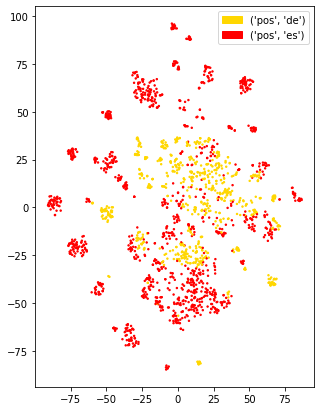

2019-10-01-232030
de vocabulary constructed.
It contains 65008 words (56.23%).
It covers 820410 tokens (93.77%).
{0: '<UNK>', 1: '.', 2: ',', 3: 'der', 4: 'die', 5: '#', 6: 'und', 7: 'in', 8: 'von', 9: 'dem'} and 64998 others

es vocabulary constructed.
It contains 43387 words (69.47%).
It covers 743755 tokens (97.99%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: 'la', 5: '.', 6: 'en', 7: 'que', 8: 'y', 9: '#'} and 43377 others

Character vocabulary constructed.
It contains 104 characters (21.76%).
It covers 7937264 character occurrences (99.97%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: '+'} and 95 others

Created:
Dataset pos de train (POSDataset): 13791
Dataset pos de dev (POSDataset): 799
Dataset pos de test (POSDataset): 967
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset ner de train (NERDataset): 24000
Dataset ner de dev (NERDataset): 2200
Dataset ner de test (NERDataset

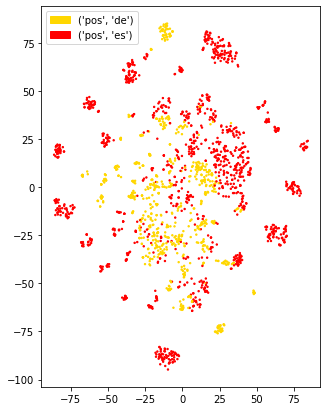

2019-10-01-235912
de vocabulary constructed.
It contains 65008 words (56.23%).
It covers 820410 tokens (93.77%).
{0: '<UNK>', 1: '.', 2: ',', 3: 'der', 4: 'die', 5: '#', 6: 'und', 7: 'in', 8: 'von', 9: 'dem'} and 64998 others

es vocabulary constructed.
It contains 43387 words (69.47%).
It covers 743755 tokens (97.99%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: 'la', 5: '.', 6: 'en', 7: 'que', 8: 'y', 9: '#'} and 43377 others

Character vocabulary constructed.
It contains 104 characters (21.76%).
It covers 7937264 character occurrences (99.97%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: '+'} and 95 others

Created:
Dataset pos de train (POSDataset): 13791
Dataset pos de dev (POSDataset): 799
Dataset pos de test (POSDataset): 967
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset ner de train (NERDataset): 24000
Dataset ner de dev (NERDataset): 2200
Dataset ner de test (NERDataset

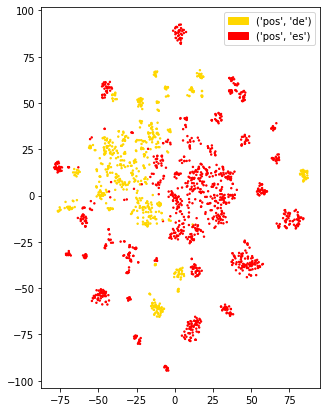

2019-10-02-015801
es vocabulary constructed.
It contains 35773 words (73.96%).
It covers 402894 tokens (97.85%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: '.', 5: 'la', 6: 'en', 7: 'y', 8: '#', 9: 'a'} and 35763 others

cs vocabulary constructed.
It contains 78011 words (54.33%).
It covers 1413047 tokens (94.44%).
{0: '<UNK>', 1: ',', 2: '.', 3: 'a', 4: 'v', 5: '#', 6: 'se', 7: 'na', 8: 'je', 9: 'že'} and 78001 others

Character vocabulary constructed.
It contains 112 characters (33.53%).
It covers 9011950 character occurrences (99.98%).
{0: '!', 1: '"', 2: '$', 3: '%', 4: '&', 5: "'", 6: '(', 7: ')', 8: '*', 9: '+'} and 103 others

Created:
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset pos cs train (POSDataset): 67852
Dataset pos cs dev (POSDataset): 9205
Dataset pos cs test (POSDataset): 10046

Loading es embedding matrix.
Loaded.
Loading cs embedding matrix.
Loaded.
Model restored from /home/mpikuliak/log

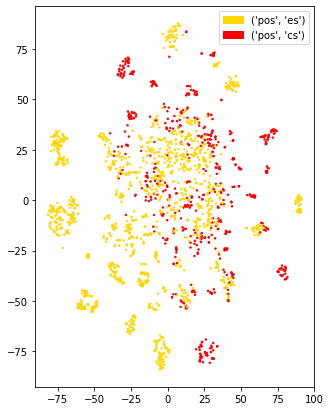

2019-10-02-025242
es vocabulary constructed.
It contains 187816 words (11.67%).
It covers 170591705 tokens (97.64%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'la', 4: '.', 5: 'en', 6: 'el', 7: 'y', 8: '#', 9: 'a'} and 187806 others

cs vocabulary constructed.
It contains 78011 words (54.33%).
It covers 1413047 tokens (94.44%).
{0: '<UNK>', 1: ',', 2: '.', 3: 'a', 4: 'v', 5: '#', 6: 'se', 7: 'na', 8: 'je', 9: 'že'} and 78001 others

Character vocabulary constructed.
It contains 484 characters (7.84%).
It covers 785727286 character occurrences (99.99%).
{0: '!', 1: '"', 2: '#', 3: '$', 4: '%', 5: '&', 6: "'", 7: '(', 8: ')', 9: '*'} and 472 others

Created:
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset pos cs train (POSDataset): 67852
Dataset pos cs dev (POSDataset): 9205
Dataset pos cs test (POSDataset): 10046
Dataset lmo es train (LMODataset): 6291474
Dataset lmo es dev (LMODataset): 8324
Dataset lmo es test (LMODat

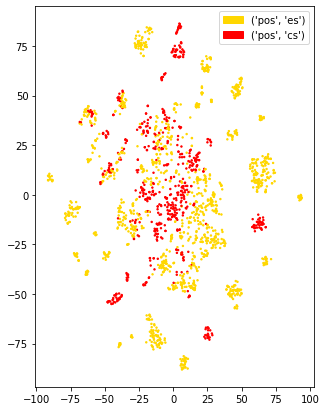

2019-10-02-034618
es vocabulary constructed.
It contains 35773 words (73.96%).
It covers 402894 tokens (97.85%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'el', 4: '.', 5: 'la', 6: 'en', 7: 'y', 8: '#', 9: 'a'} and 35763 others

cs vocabulary constructed.
It contains 195612 words (8.23%).
It covers 111703933 tokens (93.93%).
{0: '<UNK>', 1: '.', 2: ',', 3: '#', 4: 'v', 5: 'a', 6: 'se', 7: 'na', 8: 'je', 9: ')'} and 195602 others

Character vocabulary constructed.
It contains 529 characters (9.22%).
It covers 576735651 character occurrences (99.99%).
{0: '!', 1: '"', 2: '#', 3: '$', 4: '%', 5: '&', 6: "'", 7: '(', 8: ')', 9: '*'} and 517 others

Created:
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset pos cs train (POSDataset): 67852
Dataset pos cs dev (POSDataset): 9205
Dataset pos cs test (POSDataset): 10046
Dataset lmo cs train (LMODataset): 6289843
Dataset lmo cs dev (LMODataset): 12706
Dataset lmo cs test (LMODatas

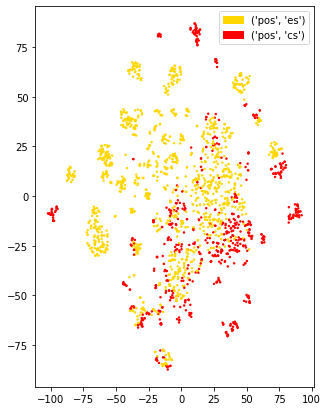

2019-10-02-041424
es vocabulary constructed.
It contains 187816 words (11.67%).
It covers 170591705 tokens (97.64%).
{0: '<UNK>', 1: 'de', 2: ',', 3: 'la', 4: '.', 5: 'en', 6: 'el', 7: 'y', 8: '#', 9: 'a'} and 187806 others

cs vocabulary constructed.
It contains 195612 words (8.23%).
It covers 111703933 tokens (93.93%).
{0: '<UNK>', 1: '.', 2: ',', 3: '#', 4: 'v', 5: 'a', 6: 'se', 7: 'na', 8: 'je', 9: ')'} and 195602 others

Character vocabulary constructed.
It contains 714 characters (9.39%).
It covers 1353474016 character occurrences (99.99%).
{0: '!', 1: '"', 2: '#', 3: '$', 4: '%', 5: '&', 6: "'", 7: '(', 8: ')', 9: '*'} and 700 others

Created:
Dataset pos es train (POSDataset): 13972
Dataset pos es dev (POSDataset): 1392
Dataset pos es test (POSDataset): 416
Dataset pos cs train (POSDataset): 67852
Dataset pos cs dev (POSDataset): 9205
Dataset pos cs test (POSDataset): 10046
Dataset lmo es train (LMODataset): 6291474
Dataset lmo es dev (LMODataset): 8324
Dataset lmo es test (LMO

In [ ]:
rs=find_runs(run_code='zero-shot-two-by-two')
from get_representations import show_representations
from data.embedding import Embeddings

for r in rs:
    Embeddings.cache = {}
    path = '/home/mpikuliak/logs/deepnet2070/'
    code = r.name
    r = Run(path+code, None, None)
    tl1, tl2 = r.config['tasks'][:2]
    task, lang = tl1
    _, epoch = r.metric_eval(task_metr[task], max_=task_max[task], task=task, language=lang)
    os.system(f'scp mpikuliak@147.175.145.128:/media/wd/mpikuliak/models/{code}-{epoch}*  /home/mpikuliak/logs/models/')
    print(r.name)
    show_representations(
        path+code,
        '/home/mpikuliak/logs/models/'+code+'-'+str(epoch),
        '-'.join(tl1),
        '-'.join(tl2))
    




In [6]:
def tempo(code, type_='all'):    
    print_results(
        runs=find_runs(
            run_type=type_,
            run_code=code
        ),
        tasks=tasks,
        langs=langs,
    )
    print()

tempo('zero-shot-two-by-two', 'var')

49.37 2019-10-01-153028
57.57 2019-10-01-162953
48.39 2019-10-01-170540
81.51 2019-10-01-174936
84.35 2019-10-01-185138
86.67 2019-10-01-195814
[('pos', 'es'), ('pos', 'cs'), ('dep', 'es'), ('dep', 'cs')]
60.08 2019-10-01-210208
66.73 2019-10-01-214128
61.53 2019-10-01-220851
67.83 2019-10-01-223743
68.99 2019-10-01-232030
64.72 2019-10-01-235912
[('pos', 'de'), ('pos', 'es'), ('ner', 'de'), ('ner', 'es')]
50.60 2019-10-02-015801
52.56 2019-10-02-025242
47.21 2019-10-02-034618
54.21 2019-10-02-041424
56.60 2019-10-02-045417
43.19 2019-10-02-060521
[('pos', 'es'), ('pos', 'cs'), ('lmo', 'es'), ('lmo', 'cs')]
22.65 2019-10-02-082107
23.97 2019-10-02-084109
22.60 2019-10-02-091152
24.86 2019-10-02-093548
27.45 2019-10-02-101138
25.11 2019-10-02-103718
[('dep', 'cs'), ('dep', 'en'), ('ner', 'cs'), ('ner', 'en')]
46.28 2019-10-02-113609
47.66 2019-10-02-115137
47.70 2019-10-02-120933
47.37 2019-10-02-122936
46.99 2019-10-02-125222
47.68 2019-10-02-131129
[('ner', 'en'), ('ner', 'de'), ('dep

In [8]:

tempo('zero-shot', 'ml-3')
tempo('zero-shot', 'rel')
tempo('zero-shot')
print()
tempo('zero-shot')
tempo('zero-shot-task')
tempo('zero-shot-lang')
tempo('zero-shot-task-lang-no-global')
tempo('zero-shot-task-lang')
print()
tempo('zero-shot-task-lang')
tempo('zero-shot-task-lang-ortho-10')
tempo('zero-shot-task-lang-ortho-25')
tempo('zero-shot-task-lang-ortho-50')
tempo('zero-shot-task-lang-ortho-100')
tempo('zero-shot-task-lang-ortho-200')
print()
tempo('zero-shot-task-lang-no-global')
tempo('zero-shot-task-lang-no-global-ortho-50')
tempo('zero-shot-task-lang-no-global-ortho-100')
tempo('zero-shot-task-lang-no-global-ortho-200')
print()
tempo('zero-shot')
tempo('zero-shot-task-emb')
tempo('zero-shot-lang-emb')
tempo('zero-shot-embs')
tempo('zero-shot-embs-400')
tempo('zero-shot-task-lang-both-embs')
print()
tempo('zero-shot')
tempo('zero-shot-task-emb')
tempo('zero-shot-lang-emb')
tempo('zero-shot-embs')
tempo('zero-shot-embs-400')
tempo('zero-shot-task-lang-both-embs')
print()
tempo('zero-shot', 'ml-3')
tempo('zero-shot')
tempo('zero-shot-embs')
tempo('zero-shot-task-lang')
print()
tempo('zero-shot-rotated', 'ml-3')
tempo('zero-shot-rotated')
tempo('zero-shot-embs-rotated')
tempo('zero-shot-task-lang-rotated')
print()
tempo('zero-shot-char-level', 'ml-3')
tempo('zero-shot-char-level')
tempo('zero-shot-embs-char-level')
tempo('zero-shot-task-lang-char-level')







# draw_graphs(lambda t: task_metr[t], tasks, langs, 'test', run_types=['all'], run_codes=[
#     'zero-shot-task-emb',
#     'zero-shot-lang-emb', 
#     'zero-shot-embs',
#     'zero-shot',
# ], focused=True)
# draw_graphs(lambda t: task_metr[t], tasks, langs, 'test', run_types=['stsl'], run_codes=[
#     'normal-training',
# ])

#draw_graphs(lambda t: 'ortho', tasks, langs, 'test', run_codes=[code])
#print_results(find_runs(run_code=code), [task], [lang], lambda t: task_metr[t], lambda t: task_max[t])

30.47 2019-08-15-091351
44.76 2019-08-15-093612
47.75 2019-08-15-101320
32.02 2019-08-15-105702
40.17 2019-08-15-111916
55.91 2019-08-15-121054
47.83 2019-08-15-125915
53.27 2019-08-15-134639
65.78 2019-08-15-141102
77.66 2019-08-15-143838
75.05 2019-08-15-150419
57.72 2019-08-15-153745

33.39 2019-08-15-125257
43.37 2019-08-15-133338
42.19 2019-08-15-142729
30.59 2019-08-15-150027
45.61 2019-08-15-153553
60.49 2019-08-15-170543
50.18 2019-08-15-175428
56.22 2019-08-15-183523
76.32 2019-08-15-191350
78.95 2019-08-15-204219
80.87 2019-08-15-211619
73.21 2019-08-15-223058

43.61 2019-08-15-192140
54.03 2019-08-15-204242
44.38 2019-08-15-225224
42.97 2019-08-16-004703
49.11 2019-08-16-023227
62.71 2019-08-16-045024
53.12 2019-08-16-070856
61.54 2019-08-16-101610
83.12 2019-08-16-121926
85.02 2019-08-16-145227
83.40 2019-08-16-171103
84.81 2019-08-16-193449


43.61 2019-08-15-192140
54.03 2019-08-15-204242
44.38 2019-08-15-225224
42.97 2019-08-16-004703
49.11 2019-08-16-023227
62.71 2019-0

53.70 2019-09-12-195701
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), ('lmo', 'cs'), ('lmo', 'de'), ('lmo', 'en'), ('lmo', 'es')]
62.73 2019-09-12-223413
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), ('lmo', 'cs'), ('lmo', 'de'), ('lmo', 'en'), ('lmo', 'es')]
84.94 2019-09-13-054342
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), ('lmo', 'cs'), ('lmo', 'de'), ('lmo', 'en'), ('lmo', 'es')]
87.71 2019-09-17-133029
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), 

83.85 2019-08-22-122832
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), ('lmo', 'cs'), ('lmo', 'de'), ('lmo', 'en'), ('lmo', 'es')]
86.84 2019-08-22-155301
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), ('lmo', 'cs'), ('lmo', 'de'), ('lmo', 'en'), ('lmo', 'es')]
82.43 2019-08-22-212043
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), ('lmo', 'cs'), ('lmo', 'de'), ('lmo', 'en'), ('lmo', 'es')]
87.46 2019-08-23-042005
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), 

60.30 2019-08-27-041725
62.30 2019-08-27-092541
49.43 2019-08-27-121828
64.20 2019-08-27-144216
53.58 2019-08-27-174640
61.83 2019-08-27-202235
83.65 2019-08-27-221250
86.17 2019-08-28-013829
83.81 2019-08-28-044314
88.04 2019-08-28-070225

50.80 2019-09-07-030131
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), ('lmo', 'cs'), ('lmo', 'de'), ('lmo', 'en'), ('lmo', 'es')]
59.95 2019-09-07-075332
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), ('lmo', 'cs'), ('lmo', 'de'), ('lmo', 'en'), ('lmo', 'es')]
59.97 2019-09-07-151102
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), ('lmo', 'cs'), ('lmo', '

30.04 2019-09-20-213904
29.03 2019-09-20-224932
30.77 2019-09-21-004558
28.51 2019-09-21-015056
25.06 2019-09-21-030014
21.86 2019-09-21-042302
12.44 2019-09-21-055612
25.07 2019-09-21-071030
55.91 2019-09-21-082408
59.66 2019-09-21-093846
63.06 2019-09-21-104815
76.97 2019-09-21-123046

41.67 2019-09-20-214352
45.79 2019-09-20-234931
43.28 2019-09-21-012750
45.47 2019-09-21-034802
20.19 2019-09-21-050612
28.86 2019-09-21-063853
16.02 2019-09-21-090942
17.95 2019-09-21-104205
58.84 2019-09-21-124513
66.20 2019-09-21-141734
56.07 2019-09-21-164105
71.71 2019-09-21-182357

44.03 2019-09-21-143100
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'), ('dep', 'de'), ('dep', 'en'), ('dep', 'es'), ('lmo', 'cs'), ('lmo', 'de'), ('lmo', 'en'), ('lmo', 'es')]
50.76 2019-09-21-194552
[('pos', 'cs'), ('pos', 'de'), ('pos', 'en'), ('pos', 'es'), ('ner', 'cs'), ('ner', 'de'), ('ner', 'en'), ('ner', 'es'), ('dep', 'cs'